In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [3]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
word = pd.read_csv('./teample_1/hankyure_economy_uft.csv', sep=',', encoding='utf-8')
# word

In [6]:
xyz = list(word['제목'])

In [7]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

# words

### 트위터로 단어 뽑기

In [8]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [9]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
tmp_wordsource_economy = count3.most_common()
# tmp_wordsource_economy

### (중간)데이터프레임화하기

In [40]:
common_word_economy = pd.DataFrame({'경제단어' : count3.most_common()})

In [1]:
common_word_economy

NameError: name 'common_word_economy' is not defined

### (중간)데이터프레임화한 것 저장

In [42]:
common_word_economy.to_csv('teample_1/common_word_economy_utf.csv', sep=',', encoding='utf-8')

In [43]:
common_word_economy.to_csv('teample_1/common_word_economy_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [12]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(5351, 26648, 7780)

In [13]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(500, 4723, 2312)

In [14]:
for word in one_words:
    print(word, end='\t')

템	학	렉	닷	중	샘	구	덜	메	피	바	합	배	점	육	시	드	브	램	땅	후	넉	태	돈	엠	영	넛	끼	객	작	잡	룰	팝	양	도	큘	홈	폭	뼈	행	해	직	또	꿀	괌	년	색	빗	창	반	검	인	추	쓱	송	함	계	팸	급	골	끈	능	머	원	못	밀	땀	을	층	놈	너	싹	겉	뚝	득	웰	패	헬	겹	뭐	볼	셰	감	외	최	택	뿐	린	빛	관	의	콕	설	화	병	률	활	물	애	빅	끝	흙	뻥	얀	욕	달	공	문	로	쉰	탁	집	오	벌	꼽	윈	레	향	빙	돌	펜	값	뭉	월	회	산	금	겨	쌀	탓	붐	빼	녀	박	안	모	매	것	초	꽃	유	제	질	경	무	낮	별	뉴	발	던	꽤	컨	두	옥	법	조	채	백	덕	윤	령	취	니	요	순	품	입	젠	용	약	앞	랬	예	폰	세	각	군	민	김	절	형	늪	끌	규	액	노	빵	때	암	귤	껏	컵	속	고	밖	똥	성	왜	이	난	국	춤	맵	렌	빚	톤	망	릭	밑	치	그	업	뻔	진	땐	견	황	넷	만	디	신	핀	날	밤	자	부	꼭	락	씨	딸	답	종	명	역	삶	폴	움	연	착	승	볕	율	묵	베	뜻	일	생	륜	핵	터	킹	임	겁	론	북	면	재	전	콜	등	쪽	앤	주	쉬	길	호	개	완	범	증	폼	턱	나	온	밥	토	적	저	현	셈	몇	청	과	변	엄	퇴	정	보	혈	단	쿡	힘	를	틀	멍	킥	독	간	풀	찮	죄	쾅	및	룻	탈	파	묘	소	말	션	철	봇	펫	콘	선	잣	몸	곧	척	곁	짱	처	납	운	내	눈	혹	벗	식	체	방	셀	깨	필	더	데	수	석	톱	특	료	존	퀵	뭘	격	손	사	섬	옷	남	뿔	큐	잔	막	칼	탑	캡	졸	족	톡	책	분	판	캐	헌	담	권	런	술	축	줄	총	결	광	닭	쇼	앱	딥	교	글	쉑	누	죽	곳	투	엘	환	둘	알	뱅	꿰	복	심	타	어	새	굴	칠	찬	리	례	앗	류	비	실	찜	맨	봄	웃	댐	당	캠	밸	립	케	여	마	뒤	찍	홍	확	빈	짤	악	편	슨	햄	랩	듯	휘	얼	농	맘	욱	첫	스	평	키	맛	짐	러	거	좀	맥	장	카	충	낚	텍	통	촌	협	폐	쩐	기	팔	멕	늘	꽉	게	차	포	준	살	은	위	봉	뜰	귀	숲	숨	몫	닉	열	갑	팀	낼	량	건	칩	꿈	틈	힐	네	워	꼴	번	코	픽	강	퍼	넌	짝	익	친	상	쏙	표	버	불	

In [15]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
len(stop_words)

544

In [16]:
# stop_words 빼기
economy_nouns = [word for word in nouns3 if word not in stop_words]
len(economy_nouns)

32755

In [17]:
economy_nouns[:10]

['최종', '특정', '산업', '리스크', '대출', '일괄', '회수', '삼성', '바이오', '분식회계']

In [18]:
economy  = nltk.Text(economy_nouns, name='사회기사')
type(economy), len(economy)

(nltk.text.Text, 32755)

In [19]:
economy.vocab().most_common(30)

[('삼성', 304),
 ('금융', 146),
 ('전자', 146),
 ('투자', 139),
 ('주택', 129),
 ('단독', 123),
 ('대출', 122),
 ('경제', 111),
 ('지원', 106),
 ('증가', 100),
 ('사회', 99),
 ('현대차', 98),
 ('은행', 92),
 ('금리', 89),
 ('성장', 89),
 ('산업', 86),
 ('논란', 84),
 ('채용', 84),
 ('인상', 83),
 ('고용', 83),
 ('중소기업', 82),
 ('국내', 80),
 ('일자리', 79),
 ('수출', 79),
 ('미국', 78),
 ('시장', 77),
 ('출시', 76),
 ('아파트', 76),
 ('소득', 76),
 ('청년', 75)]

## 워드클라우드 한글폰트 설정

In [20]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [21]:
data = economy.vocab().most_common(1000)
len(data)

1000

In [22]:
data[:10]

[('삼성', 304),
 ('금융', 146),
 ('전자', 146),
 ('투자', 139),
 ('주택', 129),
 ('단독', 123),
 ('대출', 122),
 ('경제', 111),
 ('지원', 106),
 ('증가', 100)]

In [23]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

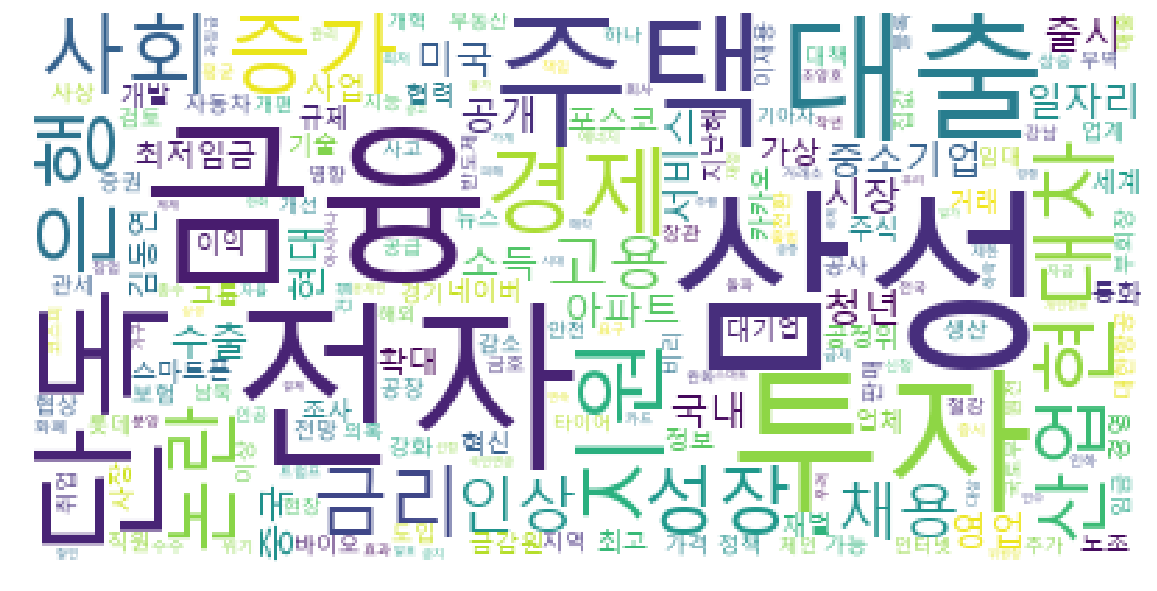

In [26]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

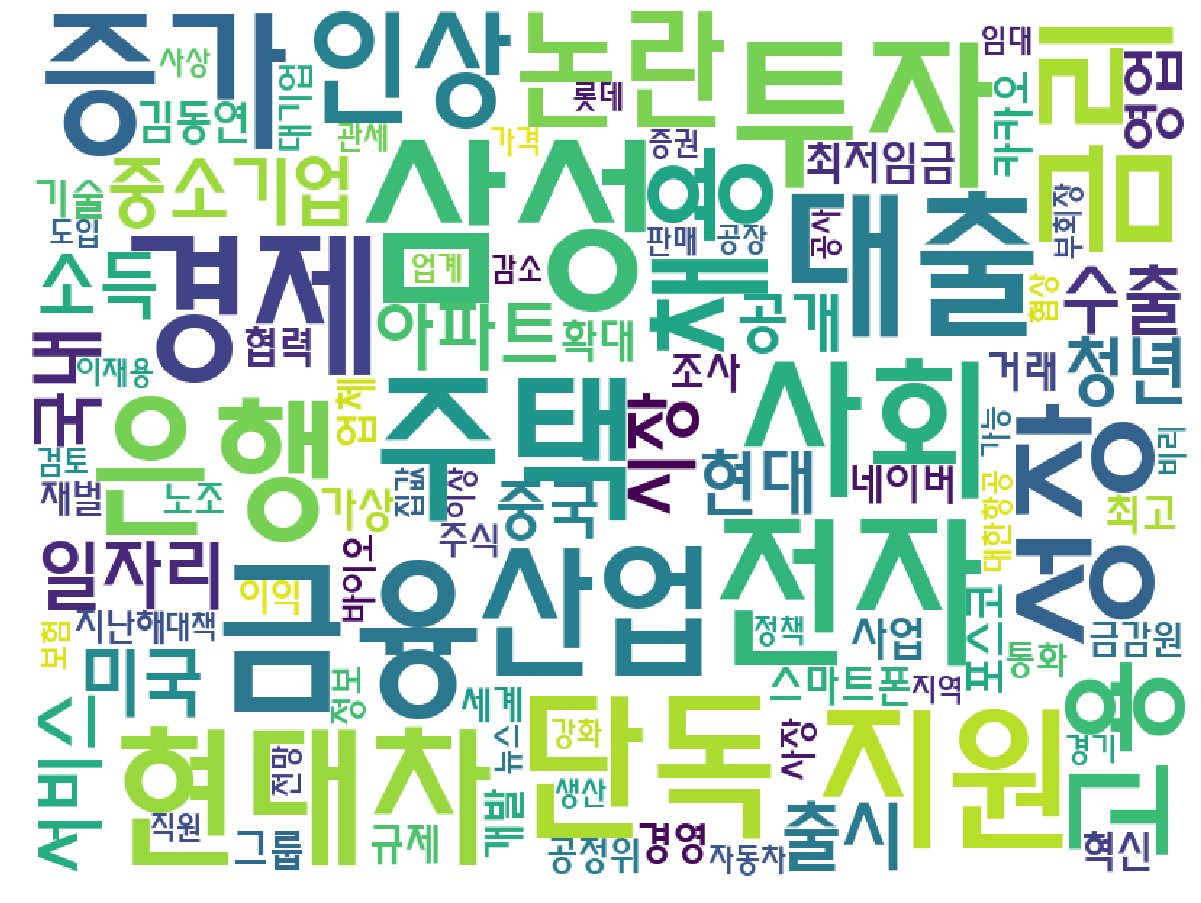

In [27]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/economy_add_stopwords_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)